### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# set parameters
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:cyan']

### create test dataset

In [3]:
# create small dataset with different directions on each axis
n_cat = 3
x_train = np.array([[0, 0, 0],
                   [1, 1, 0],
                   [1, 0, 1],
                   [0.97, 1.02, 0.0],
                   [0.97, 1.05, 0],
                   [0.97, 0, 1.02],
                   [0.94, 0, 0.98]])
y_train = np.array([0, 1, 2, 1, 1, 2, 2])

In [4]:
# test 2 - multidimensional
n_cat = 2
x_train = np.array([[0., 0., 0.],
                   [1., 1., 1.]])
y_train = np.array([0, 1])

In [5]:
# test 3 - non-zero reference
n_cat = 2
x_train = np.array([[0., .2, .4],
                    [1., 1., 1.]])
y_train = np.array([0, 1])

In [6]:
# test 4 - non-zero ref and multi pts
n_cat = 2
x_train = np.array([[0., .2, .4],
                    [1., 1., 1.],
                    [1, .8, .8]])
y_train = np.array([0, 1, 1])

In [7]:
# test 5 - non-zero ref and multi classes
# create small dataset with different directions on each axis
n_cat = 3
x_train = np.array([[0., 0.2, 0.4],
                    [1., 1., 0.],
                    [1., .8, 0.],
                    [1., 0., 1.],
                    [1., 0., 0.8]])
y_train = np.array([0, 1, 1, 2, 2])

In [8]:
# test 6 - pts that is down (under) as it seems to fait with the real FLAME data
n_cat = 3
x_train = np.array([[0., 0., 0., 0., 0.],
                    [1., 1., .4, .3, .25],
                    [-1., -1., -.4, -.3, -.25]])
y_train = np.array([0, 1, 2])

In [9]:
# test 7 - test 6 but with more than one point per category
n_cat = 3
x_train = np.array([[0., 0., 0., 0., 0.],
                    [1., 0.9, .3, .2, .15],
                    [1., 1.1, .5, .4, .35],
                    [-1., -0.9, -.3, -.2, -.15],
                    [-1., -1.1, -.5, -.4, -.35]])
y_train = np.array([0, 1, 1, 2, 2])

In [10]:
# test 8 - test 7 but with 2 category
n_cat = 2
x_train = np.array([[0., 0., 0., 0., 0.],
                    [1., 0.9, .3, .2, .15],
                    [1., 1.1, .5, .4, .35]])
y_train = np.array([0, 1, 1])

### plot the data as the first dimension (horizontal) vs all the other

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


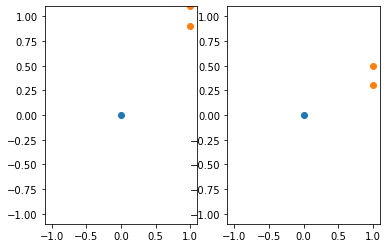

In [11]:
plt.figure()
for cat in range(n_cat):
    x_ = x_train[y_train == cat]
    plt.subplot(1, 2, 1)
    plt.scatter(x_[:, 0], x_[:, 1], color=colors[cat])
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    
    plt.subplot(1, 2, 2)
    plt.scatter(x_[:, 0], x_[:, 2], color=colors[cat])
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])

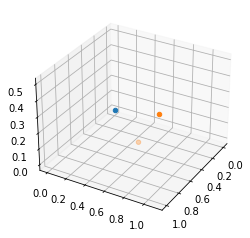

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for cat in range(n_cat):
    x_ = x_train[y_train == cat]
    ax.scatter3D(x_[:, 0], x_[:, 1], x_[:, 2], color=colors[cat]);
    ax.view_init(30, 30)  # elevation, azimuth 

### linear regression method

In [35]:
def fit_linear_regression(x, y, n_cat, lr=0.1, tol=1e-3, max_n_iter=5000, verbose=False):    
    # retrieve parameters
    n_dim = np.shape(x)[-1]
    # declare a set of weights for each variable
    weights = np.zeros((n_cat, n_dim))
    
    # define parameters for stopping regression
    tot_SSE = 1e10
    n_iter = 0
    
    # start regression loop
    while tot_SSE > tol and n_iter < max_n_iter:
        tot_SSE = 0 # initialize
        #compute weights for each category
        for cat in range(n_cat):
            x_ = x[y == cat]
            n_pts = np.shape(x_)[0]
            
            if n_pts > 0:
                x_train = x_[:, 0]
                x_label = x_[:, 1:]
                
                # initilaize weights of first column
                if n_iter == 0:
                    if np.mean(x_train) >= 0:
                        weights[cat, 0] = 1
                    else:
                        weights[cat, 0] = -1   
                
                # expand dims to have # (n_pts, n_dims - 1)
                x_train = np.repeat(np.expand_dims(x_train, axis=1), np.shape(x_label)[1], axis=1)  # add (n_dims - 1)
                weights_ = np.repeat(np.expand_dims(weights[cat, 1:], axis=0), len(x_), axis=0)  # add (n_pts)
                
                if verbose:
                    print("category:{} (n_pts: {})".format(cat, n_pts))
                    print("x_train", np.shape(x_train))
                    print(x_train)
                    print("x_label", np.shape(x_label))
                    print(x_label)
                    print("weights[cat]", np.shape(weights[cat]))
                    print(weights[cat])
                    print("weights_", np.shape(weights_))

                # compute predictions x^ for independent dimensions
                x_hat = x_train * weights_ / weights[cat, 0]  # (n_pts, n_dims - 1)
                
                # compute errors
                diffs = x_label - x_hat
                SSE = np.sum(np.power(diffs, 2))
                #errors = np.sqrt(errors)
                errors = diffs
                tot_SSE += SSE

                # compute gradient for each points
                grads = np.squeeze(np.mean(-2 * errors * x_label, axis=0))

                # update parameters
                weights[cat, 1:] -= lr / n_pts * grads
                
                if verbose:
                    print("x_hat", np.shape(x_hat))
                    print(x_hat[:, :10])
                    print("errors", np.shape(errors))
                    print(errors[:, :10])
                    print("grads", np.shape(grads))
                    print(grads[:10])
                    print("weights[cat]", np.shape(weights[cat]))
                    print(weights[cat, :10])
                    print("{} SSE:{:0.4f}, MSE:{:0.4f}".format(n_iter, SSE, np.sqrt(SSE)))                
                    print()
        
        if verbose:
            print("{} error SSE:{:0.4f}, MSE:{:0.4f}".format(n_iter, tot_SSE, np.sqrt(tot_SSE)))
        else:
            print("{} error SSE:{:0.4f}, MSE:{:0.4f}".format(n_iter, tot_SSE, np.sqrt(tot_SSE)), end = "\r")
        
        n_iter += 1
        
        if n_iter >= max_n_iter:
            print("regression stoped due to max limit ({})".format(max_n_iter))
        elif tot_SSE <= tol:
            print("regression reached tolerance! (in {} iteration)".format(n_iter - 1))
    
    print("Final error SSE:{:0.4f}, MSE:{:0.4f}".format(tot_SSE, np.sqrt(tot_SSE))) 
    return weights

In [41]:
n_cat = len(np.unique(y_train))
print("n_cat:", n_cat)
print("x_train", np.shape(x_train))
print(x_train)
ref = np.mean(x_train[y_train == 0], axis=0)  # (n_dims, )
print("ref", np.shape(ref))
print(ref)
x_train_ref = x_train - ref
print("x_train_ref")
print(x_train_ref)
print("-----------------")
w = fit_linear_regression(x_train_ref, y_train, n_cat, max_n_iter=400, lr=0.1, verbose=False)
print("weights", np.shape(w))
print(w)

n_cat: 2
x_train (3, 5)
[[0.   0.   0.   0.   0.  ]
 [1.   0.9  0.3  0.2  0.15]
 [1.   1.1  0.5  0.4  0.35]]
ref (5,)
[0. 0. 0. 0. 0.]
x_train_ref
[[0.   0.   0.   0.   0.  ]
 [1.   0.9  0.3  0.2  0.15]
 [1.   1.1  0.5  0.4  0.35]]
-----------------
regression stoped due to max limit (400)
Final error SSE:0.0869, MSE:0.2947
weights (2, 5)
[[1.         0.         0.         0.         0.        ]
 [1.         1.01       0.42499997 0.33333163 0.28998841]]


## Predict tuning directions

In [42]:
# create pts along x axis
x_tun_pred = np.array([[0., 1.]]).astype(float)
x_tun_pred = np.repeat(x_tun_pred, n_cat, axis=0)  # (n_cat, n_pts)
x_tun_pred = np.repeat(np.expand_dims(x_tun_pred, axis=1), np.shape(x_train)[1], axis=1)  # add n_dims (n_cat, n_dims, n_pts)

# expand weights with n_pts dimension on axis 2
w_ = np.repeat(np.expand_dims(w, axis=2), np.shape(x_tun_pred)[2], axis=2)  # add n_pts (n_cat, n_dims, n_pts)

# predict over other dimensions (n_cat, n_dims, n_pts)
ref_rep = np.repeat(np.expand_dims(ref, axis=0), n_cat, axis=0)  # add n_cat (n_cat, n_dims)
ref_rep = np.repeat(np.expand_dims(ref_rep, axis=2), np.shape(x_tun_pred)[2], axis=2)  # add n_pts (n_cat, n_dims, n_pts)
y_tun_pred = x_tun_pred * w_ + ref_rep

### plot resulting weights

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


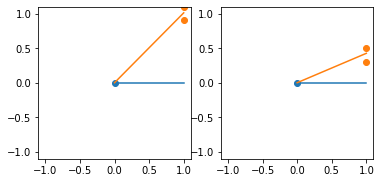

In [43]:
plt.figure()
for cat in range(n_cat):
    x_ = x_train[y_train == cat]
    plt.subplot(1, 2, 1, aspect='equal')
    plt.scatter(x_[:, 0], x_[:, 1], color=colors[cat])
    plt.plot(y_tun_pred[cat, 0], y_tun_pred[cat, 1], color=colors[cat])
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])
    
    plt.subplot(1, 2, 2, aspect='equal')
    plt.scatter(x_[:, 0], x_[:, 2], color=colors[cat])
    plt.plot(y_tun_pred[cat, 0], y_tun_pred[cat, 2], color=colors[cat])
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.1, 1.1])

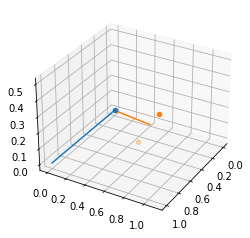

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for cat in range(n_cat):
    x_ = x_train[y_train == cat]
    ax.scatter3D(x_[:, 0], x_[:, 1], x_[:, 2], color=colors[cat])
    ax.plot3D(y_tun_pred[cat, 0], y_tun_pred[cat, 1], y_tun_pred[cat, 2], color=colors[cat])
    ax.view_init(30, 30)  # elevation, azimuth 

### create a test set

In [45]:
x_test = np.array([[0, 0, 0],
                   [1, 1.1, 0],
                   [1, 0, 1.1]])
y_test = np.array([0, 1, 2])

### apply ref base mechanism

In [46]:
def ref_base_classifier(r, t, x_test, verbose=False):
    # control that tuing vector is a correct size
    if len(np.shape(t)) != 2:
        if len(np.shape(t)) == 1:
            t = np.expand_dims(t, axis=0)
        else:
            print("tuning direction vector is not dim 2!")
            
    # control that tuning vectors and x_test have same dimensions
    if np.shape(t)[1] != np.shape(x_test)[1]:
        raise ValueError("tuning dims and x_test does not have similar dimensions ({} vs. {})".format(np.shape(t)[1], np.shape(x_test)[1]))
    
    # create unity vectors
    t_unit = t / np.repeat(np.expand_dims(np.linalg.norm(t, axis=1), axis=1), np.shape(t)[1], axis=1)
    
    # compute diff from ref
    diff = x_test - r
    
    # compute scalar proj
    proj = x_test @ t_unit.T
    
    if verbose:
        print("proj", np.shape(proj))
        print(proj)
    
    # ReLu activation
    proj[proj < 0] = 0
    
    return proj

In [47]:
# test case with pre-defined tuning function
ref_test = np.array([0, 0])
t_test = np.array([[0, 1], [1, 1], [1, 0]])
x_test = np.array([[1, 0], [0, 1], [1, 1], [0, 0.5]])

x_pred = ref_base_classifier(ref_test, t_test, x_test, verbose=True)
x_pred = np.argmax(x_pred, axis=1)
print(x_pred)

proj (4, 3)
[[0.         0.70710678 1.        ]
 [1.         0.70710678 0.        ]
 [1.         1.41421356 1.        ]
 [0.5        0.35355339 0.        ]]
[2 0 1 0]


In [48]:
# test with trained regression

# get tuned parameters
t = np.ones((np.shape(w)[0], np.shape(w)[1] + 1))
t[:, 1:] = w

# create a test case
x_test = np.array([[0, 0, 0], [1, 1, 0.1], [1, 0.2, 1.1], [0, 0.7, 0.5]])
print("t", np.shape(t))
print(t)

# predict test case
x_pred = ref_base_classifier(ref, t, x_test)
x_pred = np.argmax(x_pred, axis=1)
print("x_pred")
print(x_pred)


t (2, 6)
[[1.         1.         0.         0.         0.         0.        ]
 [1.         1.         1.01       0.42499997 0.33333163 0.28998841]]


ValueError: tuning dims and x_test does not have similar dimensions (6 vs. 3)

### plot category predictions

In [ ]:
plt.figure()
for cat in range(n_cat):
    x_ = x_train[y_train == cat]
    plt.subplot(1, 2, 1)
    plt.scatter(x_[:, 0], x_[:, 1], color=colors[cat])
    plt.plot(y_tun_pred[cat, 0], y_tun_pred[cat, 1], color=colors[cat])
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    
    plt.subplot(1, 2, 2)
    plt.scatter(x_[:, 0], x_[:, 2], color=colors[cat])
    plt.plot(y_tun_pred[cat, 0], y_tun_pred[cat, 2], color=colors[cat])
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    
# add tests
for i in range(len(x_test)):
    plt.subplot(1, 2, 1)
    plt.plot(x_test[i, 0], x_test[i, 1], marker='x', color=colors[x_pred[i]])
    
    plt.subplot(1, 2, 2)
    plt.plot(x_test[i, 0], x_test[i, 2], marker='x', color=colors[x_pred[i]])

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
for cat in range(n_cat):
    x_ = x_train[y_train == cat]
    ax.scatter3D(x_[:, 0], x_[:, 1], x_[:, 2], color=colors[cat])
    ax.plot3D(y_tun_pred[cat, 0], y_tun_pred[cat, 1], y_tun_pred[cat, 2], color=colors[cat])
    ax.view_init(30, 30)  # elevation, azimuth 
    
# add tests
for i in range(len(x_test)):
    ax.plot3D(x_test[i, 0], x_test[i, 1], x_test[i, 2], marker='x', color=colors[x_pred[i]])